In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import math
import os

from imutils.object_detection import non_max_suppression

In [2]:
# Helper functions

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((3,3),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45 :
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

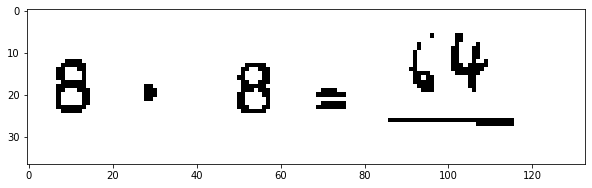

In [3]:
# Read and preprocess image

#image = cv2.imread('testImages/class_a/e1.jpg')
#image = cv2.imread('testImages/class_a/equ1.jpg')
image = cv2.imread('testImages/class_a/equ31.jpg')
imageCopy = image.copy()
image = get_grayscale(image)
image = thresholding(image)

# Plot equation image
plt.figure(figsize=(10,10))
plt.imshow(image, cmap='gray')

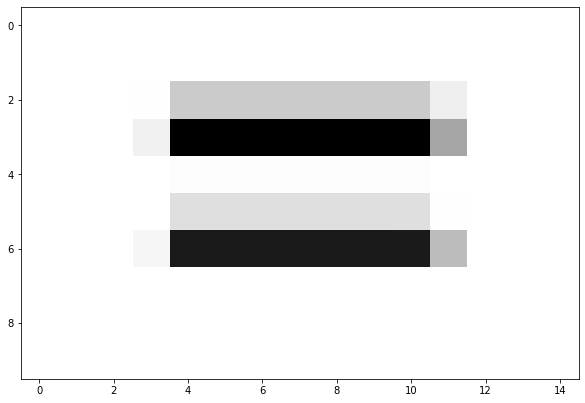

In [4]:
# Read and preprocess template
template = cv2.imread('testImages/equalSignTemplate.jpg')
template = get_grayscale(template)
length = template.shape[1]
width = template.shape[0]

# Resize template 
templateScale1 = cv2.resize(template, (15, 10))
templateScale2 = cv2.resize(template, (30, 20))

# Plot templates
plt.figure(figsize=(10,10))
plt.imshow(templateScale1, cmap='gray')


In [5]:
# Template matching 
match = match_template(image, templateScale1)

# Get highes likelihood box
_minVal, _maxVal, minLoc, maxLoc = cv2.minMaxLoc(match, None)
xMax = maxLoc[0]
yMax = maxLoc[1]
H, W = templateScale1.shape[:2]
boxMax = (xMax, yMax, xMax + W, yMax + H)

# Print most likely matching box only 
d = cv2.rectangle(imageCopy, (boxMax[0], boxMax[1]), (boxMax[2], boxMax[3]), (255, 0, 0), 3)

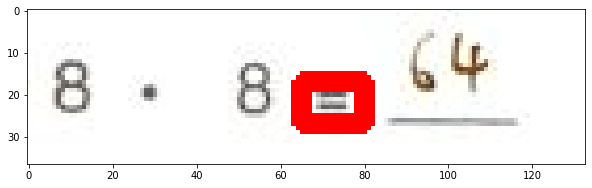

In [6]:
# Show the template and the final output
plt.figure(figsize=(10,10))
plt.imshow(imageCopy)

